In [1]:
# 手搓GAN
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(), # Relu 的目的是为了让生成的图片更加真实
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )
    def forward(self, x):
        return self.net(x).view(-1, 28, 28, 1) # 生成的图片是28*28的

In [3]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x.view(-1, 784))

In [6]:
def train():
    # 超参数
    batch_size = 100
    lr = 0.0002
    epochs = 10
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # 加载数据集
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)) 
    ])
    dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 初始化网络
    G = Generator().to(device)
    D = Discriminator().to(device)
    criterion = nn.BCELoss() # 二分类交叉熵损失
    optimizer_G = optim.Adam(G.parameters(), lr=lr)
    optimizer_D = optim.Adam(D.parameters(), lr=lr)

    # 训练
    for epoch in range(epochs):
        for i, (real_imgs, _) in enumerate(dataloader):
            real_imgs = real_imgs.to(device)
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device) # 希望判别器将生成的图片判别为0
 
            # 训练判别器
            optimizer_D.zero_grad()
            real_outputs = D(real_imgs)
            d_loss_real = criterion(real_outputs, real_labels)
            d_loss_real.backward()

            z = torch.randn(batch_size, 100).to(device)
            fake_imgs = G(z)
            fake_outputs = D(fake_imgs)
            d_loss_fake = criterion(fake_outputs, fake_labels)
            d_loss_fake.backward()
            optimizer_D.step()

            # 训练生成器
            optimizer_G.zero_grad()
            z = torch.randn(batch_size, 100).to(device)
            fake_imgs = G(z)
            fake_outputs = D(fake_imgs)
            g_loss = criterion(fake_outputs, real_labels)
            g_loss.backward()
            optimizer_G.step()

            if i % 100 == 0:
            
                print(f'Epoch [{epoch}/{epochs}], Step [{i}/{len(dataloader)}], d_loss_real: {d_loss_real.item()}, d_loss_fake: {d_loss_fake.item()}, g_loss: {g_loss.item()}')
                # 展示生成的图片
        fake_imgs = fake_imgs.view(fake_imgs.size(0), 28, 28)
        plt.imshow(fake_imgs[0].cpu().detach().numpy(), cmap='gray')
        plt.show()

        # 保存生成的图片
        z = torch.randn(100, 100).to(device)
        fake_imgs = G(z)
        fake_imgs = fake_imgs.view(fake_imgs.size(0), 28, 28)  

Epoch [0/10], Step [0/600], d_loss_real: 0.7433854341506958, d_loss_fake: 0.6920700073242188, g_loss: 0.6972607374191284


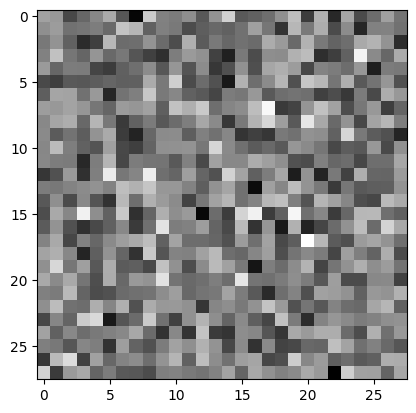

Epoch [0/10], Step [100/600], d_loss_real: 0.018759803846478462, d_loss_fake: 0.08602292835712433, g_loss: 3.2780537605285645


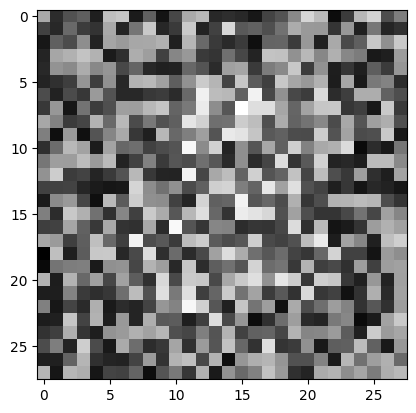

Epoch [0/10], Step [200/600], d_loss_real: 0.015067951753735542, d_loss_fake: 0.0777290090918541, g_loss: 3.1306209564208984


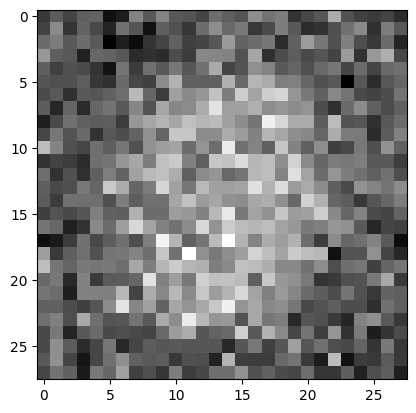

Epoch [0/10], Step [300/600], d_loss_real: 0.027481717988848686, d_loss_fake: 0.021386345848441124, g_loss: 5.561724662780762


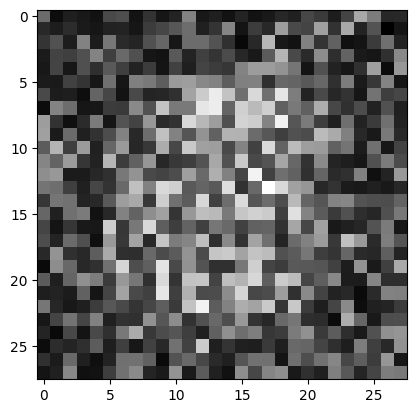

Epoch [0/10], Step [400/600], d_loss_real: 0.09250537306070328, d_loss_fake: 0.05548539385199547, g_loss: 5.94558572769165


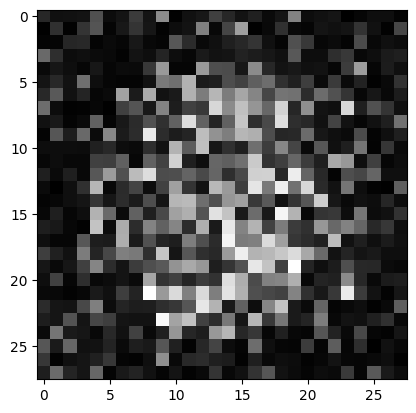

Epoch [0/10], Step [500/600], d_loss_real: 0.09955253452062607, d_loss_fake: 0.07217196375131607, g_loss: 5.420188903808594


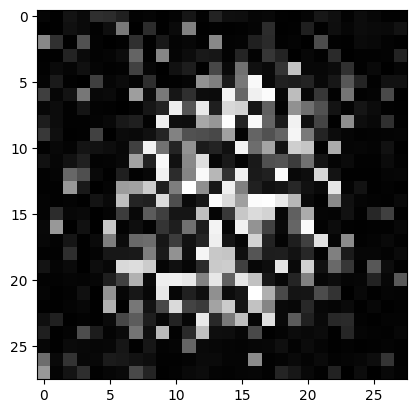

Epoch [1/10], Step [0/600], d_loss_real: 0.03719790279865265, d_loss_fake: 0.04395362734794617, g_loss: 4.516294479370117


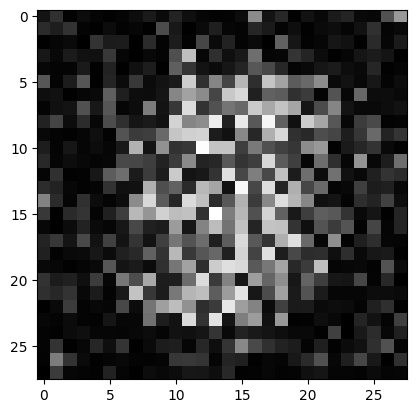

Epoch [1/10], Step [100/600], d_loss_real: 0.13523057103157043, d_loss_fake: 0.06329479813575745, g_loss: 4.242255687713623


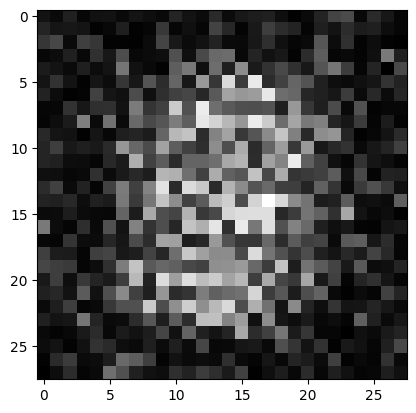

Epoch [1/10], Step [200/600], d_loss_real: 0.06134519353508949, d_loss_fake: 0.09225920587778091, g_loss: 3.765972852706909


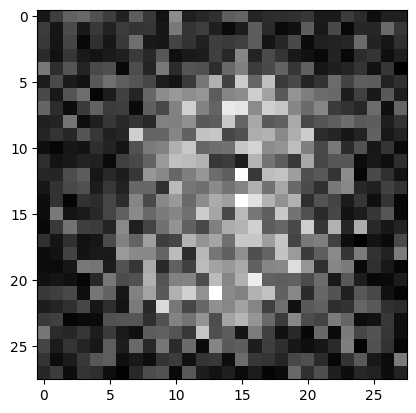

Epoch [1/10], Step [300/600], d_loss_real: 0.29852285981178284, d_loss_fake: 0.3199629485607147, g_loss: 2.8760745525360107


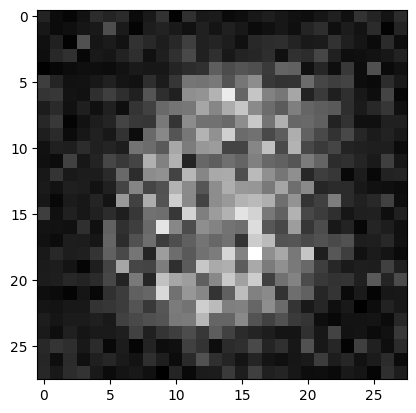

Epoch [1/10], Step [400/600], d_loss_real: 0.36118221282958984, d_loss_fake: 0.6654928922653198, g_loss: 3.124500274658203


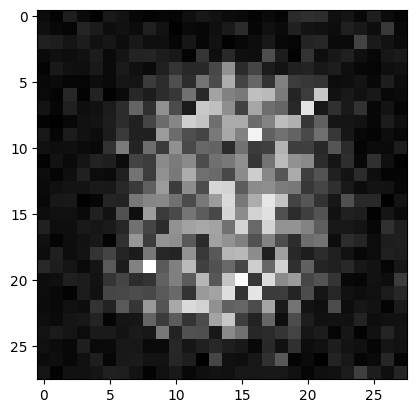

Epoch [1/10], Step [500/600], d_loss_real: 0.27534785866737366, d_loss_fake: 0.15477614104747772, g_loss: 3.642780065536499


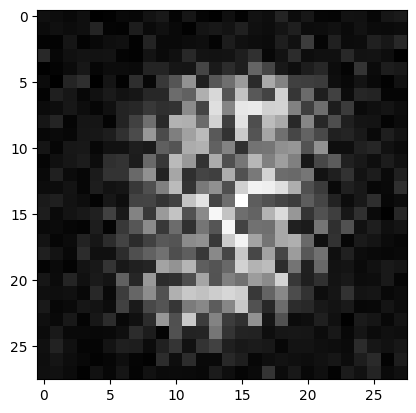

KeyboardInterrupt: 

In [7]:
train()
